<a href="https://colab.research.google.com/github/MATNAT93/Music-Genre-Recognition/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
              precision    recall  f1-score   support

       blues       0.19      0.50      0.28        14
   classical       0.55      0.50      0.52        12
     country       0.23      0.22      0.22        23
       disco       0.26      0.32      0.29        22
      hiphop       0.12      0.09      0.10        23
        jazz       0.24      0.50      0.32        12
       metal       0.40      0.38      0.39        21
         pop       0.58      0.30      0.40        23
      reggae       0.00      0.00      0.00        21
        rock       0.29      0.15      0.20        27

    accuracy                           0.26       198
   macro avg       0.29      0.30      0.27       198
weighted avg       0.28      0.26      0.25       198



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


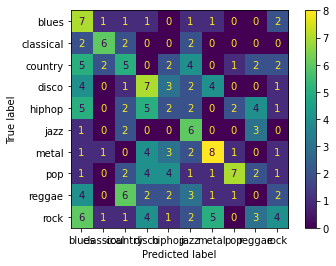

In [20]:
import pandas as pd 
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv('/content/drive/My Drive/data_python/données.csv')

# On split le dataset pour pouvoir entrainer le modèle par la suite
X_train, X_test, y_train, y_test = train_test_split(df[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                                                        'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                                                        'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 
                                                        'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']],df['genre'], test_size=0.2, random_state=0)
#Fit du training set
knn = KNeighborsClassifier(n_neighbors=5) # 5 "points" les plus proches 
knn.fit(X_train, y_train)

# Prediction sur le Test set
y_pred = knn.predict(X_test)

#Vérification de la qualité du modèle
print(classification_report(y_test, y_pred))

sklearn.metrics.plot_confusion_matrix(knn, X_test, y_test) # Matrice de confusion
